In [33]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [34]:
 #sklearn preproc

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

import pickle

In [35]:
data_index=pd.read_csv('../data/out_csv/index_France.csv')

In [36]:
data_index=data_index.set_index('date')

In [37]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.037264,0.030978,0.0,14.0,2.0,1.0,0.0,0.033268,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-26,0.037264,0.030978,0.0,18.0,4.0,2.0,1.0,0.033268,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-27,0.037264,0.030978,0.0,38.0,20.0,2.0,0.0,0.033268,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-28,0.037264,0.030978,0.0,57.0,19.0,2.0,0.0,0.033268,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-29,0.063456,0.077434,0.0,100.0,43.0,2.0,0.0,0.056657,0.0,0.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
data_index=data_index.fillna(0)

In [39]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [40]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [41]:
n = len(X)
X_train = X[0:int(n-50)]
X_test=X[int(n-50):]
y_train=y[0:int(n-50)]
y_test=y[int(n-50):]

In [42]:
country='France'

In [43]:
path='/home/sumedha/code/covid_time_series_prediction/covid_time_series_prediction/data/models'

In [44]:
model=pickle.load(open(f'{path}/model_{country}.pkl','rb'))

In [45]:
model

SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

In [46]:
X_test_columns=data_index.drop(columns=['total_deaths','new_cases','new_deaths'])
X_test_columns.columns

Index(['containment_and_health', 'stringency', 'economics_sup', 'total_cases',
       'gov_response', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'day-1', 'day-2', 'day-3',
       'day-4', 'day-5', 'day-6', 'day-7', 'day-8', 'day-9', 'day-10'],
      dtype='object')

In [47]:
X_test_df=pd.DataFrame(X_test,columns=X_test_columns.columns)
X_predict=X_test_df.tail(10)
X_predict=X_predict.reset_index(drop=True)

In [48]:
for i in range(1,10):
    X_predict.loc[i,'containment_and_health':'total_boosters']=X_predict.loc[0,'containment_and_health':'total_boosters']
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,0.997724,0.997432,0.997332
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,0.998023,0.997724,0.997710
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,0.998079,0.998191,0.998137,0.998196,0.998023,0.998023,0.998023,0.998002
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,0.998357,0.998463,0.998495,0.998534,0.998753,0.998023,0.998023,0.998301
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998709,0.998152,0.998357,0.998741,0.998767,0.998893,0.999091,0.998753,0.998023,0.998301
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999106,0.998709,0.998357,0.998741,0.999045,0.999164,0.999449,0.999091,0.998753,0.998301
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999411,0.999106,0.998914,0.998741,0.999045,0.999443,0.999721,0.999449,0.999091,0.999031
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999795,0.999411,0.999311,0.999298,0.999045,0.999443,1.000000,0.999721,0.999449,0.999369
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.999795,0.999616,0.999695,0.999602,0.999443,1.000000,1.000000,0.999721,0.999728
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
min_num=min(y_test)
max_num=max(y_test)

In [51]:
list_pred=[]


for j in range(0,10):
    y_pred_=model.predict(pd.DataFrame(X_predict.loc[j]).T)
    list_pred.append(y_pred_)
    
    y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
    
    #X_predict[j+1,f'day-{j+1}']=y_pred_
    X_predict.at[j+1,f'day-{j+1}']=y_pred_scale


/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sume

In [52]:
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.997874,0.997602,0.997450,0.997495,0.997070,0.997467,0.998023,9.977241e-01,9.974322e-01,9.973319e-01
1,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.394220,0.997874,0.997807,0.997833,0.997799,0.997467,0.998023,9.980227e-01,9.977241e-01,9.977102e-01
2,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,-3.047164,0.998079,0.998191,0.998137,0.998196,0.998023,9.980227e-01,9.980227e-01,9.980022e-01
3,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998152,0.998152,-21.256146,0.998463,0.998495,0.998534,0.998753,9.980227e-01,9.980227e-01,9.983009e-01
4,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.998709,0.998152,0.998357,-90.390180,0.998767,0.998893,0.999091,9.987526e-01,9.980227e-01,9.983009e-01
5,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999106,0.998709,0.998357,0.998741,54.539087,0.999164,0.999449,9.990910e-01,9.987526e-01,9.983009e-01
6,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999411,0.999106,0.998914,0.998741,0.999045,433.765017,0.999721,9.994493e-01,9.990910e-01,9.990310e-01
7,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,0.999795,0.999411,0.999311,0.999298,0.999045,0.999443,4336.608185,9.997213e-01,9.994493e-01,9.993695e-01
8,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,0.999795,0.999616,0.999695,0.999602,0.999443,1.000000,-8.935631e+06,9.997213e-01,9.997279e-01
9,0.0,0.0,0.0,0.996502,0.151723,0.999231,0.999946,0.999931,0.99748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.057297e+17,1.000000e+00


In [55]:
pred_=pd.DataFrame(list_pred)

Text(0.5, 0, 'Date')

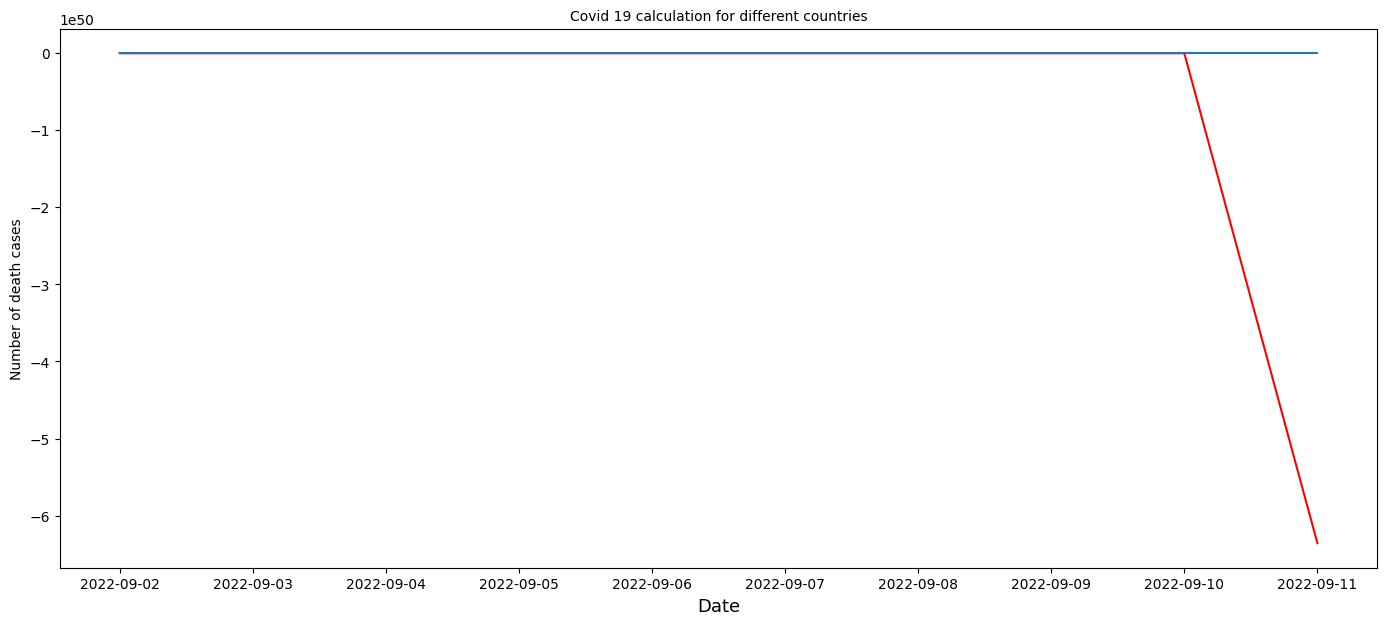

In [57]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[40:],pred_,color='r');
plt.plot(y_test.index[40:],y_test[40:]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)